In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.decomposition import PCA
from matplotlib import pyplot as plt
from sklearn.preprocessing import normalize, StandardScaler
%matplotlib inline

pd.options.display.max_columns = None
pd.options.display.max_rows = None
sns.set_style("whitegrid")

In [10]:
test = pd.read_csv('house_prices_train.csv')
with open('columns.txt', 'w') as f:
    for i in test.columns.to_list():
        f.write(i + '\n')

In [4]:
train = pd.read_csv('house_prices_train.csv')
test = pd.read_csv('house_prices_test.csv')
print('Shape: ' + str(train.shape))
train.head()

Shape: (1460, 81)


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


## Первичный анализ данных



In [17]:
# Посмотрим какие столбцы содержат NaN

train.isna().sum()[train.isna().sum() > 0]

LotFrontage      259
Alley           1369
MasVnrType         8
MasVnrArea         8
BsmtQual          37
BsmtCond          37
BsmtExposure      38
BsmtFinType1      37
BsmtFinType2      38
Electrical         1
FireplaceQu      690
GarageType        81
GarageYrBlt       81
GarageFinish      81
GarageQual        81
GarageCond        81
PoolQC          1453
Fence           1179
MiscFeature     1406
dtype: int64

In [18]:
# В качественных признаках, где NaN означает отсутствие определенного качества заменим NaN на 'no'

train.Alley.fillna('no', inplace=True)
train.BsmtQual.fillna('no', inplace=True)
train.BsmtCond.fillna('no', inplace=True)
train.BsmtExposure.fillna('no', inplace=True)
train.BsmtFinType1.fillna('no', inplace=True)
train.BsmtFinType2.fillna('no', inplace=True)
train.FireplaceQu.fillna('no', inplace=True)
train.GarageType.fillna('no', inplace=True)
train.GarageFinish.fillna('no', inplace=True)
train.GarageQual.fillna('no', inplace=True)
train.GarageCond.fillna('no', inplace=True)
train.GarageCond.fillna('no', inplace=True)
train.GarageCond.fillna('no', inplace=True)
train.PoolQC.fillna('no', inplace=True)
train.Fence.fillna('no', inplace=True)
train.MiscFeature.fillna('no', inplace=True)
train.MasVnrType.fillna('no', inplace=True)


# В количественных признаках, где NaN означает отсутствие качества, заменим NaN на 0

train.LotFrontage.fillna(0, inplace=True)
train.GarageYrBlt.fillna(0, inplace=True)
train.MasVnrArea.fillna('no', inplace=True)



In [21]:
# в признаке Electrical есть всего одно наблюдение со значением NaN. Посмотрим на этот признак

train[train.Electrical.isna()]

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice


In [22]:
# Наблюдение не выглядет аномальным. Предположим, что это пропущенное значение и заполним его наиболее частым.
train.Electrical.fillna('SBrkr', inplace=True)

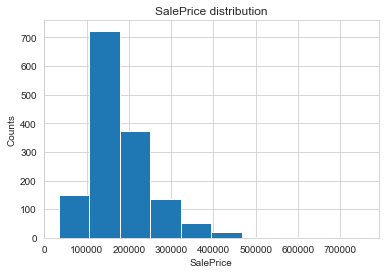

In [200]:
plot = train['SalePrice'].hist()
plot.set_xlabel('SalePrice')
plot.set_ylabel('Counts')
plot.set_title('SalePrice distribution')
plt.show()

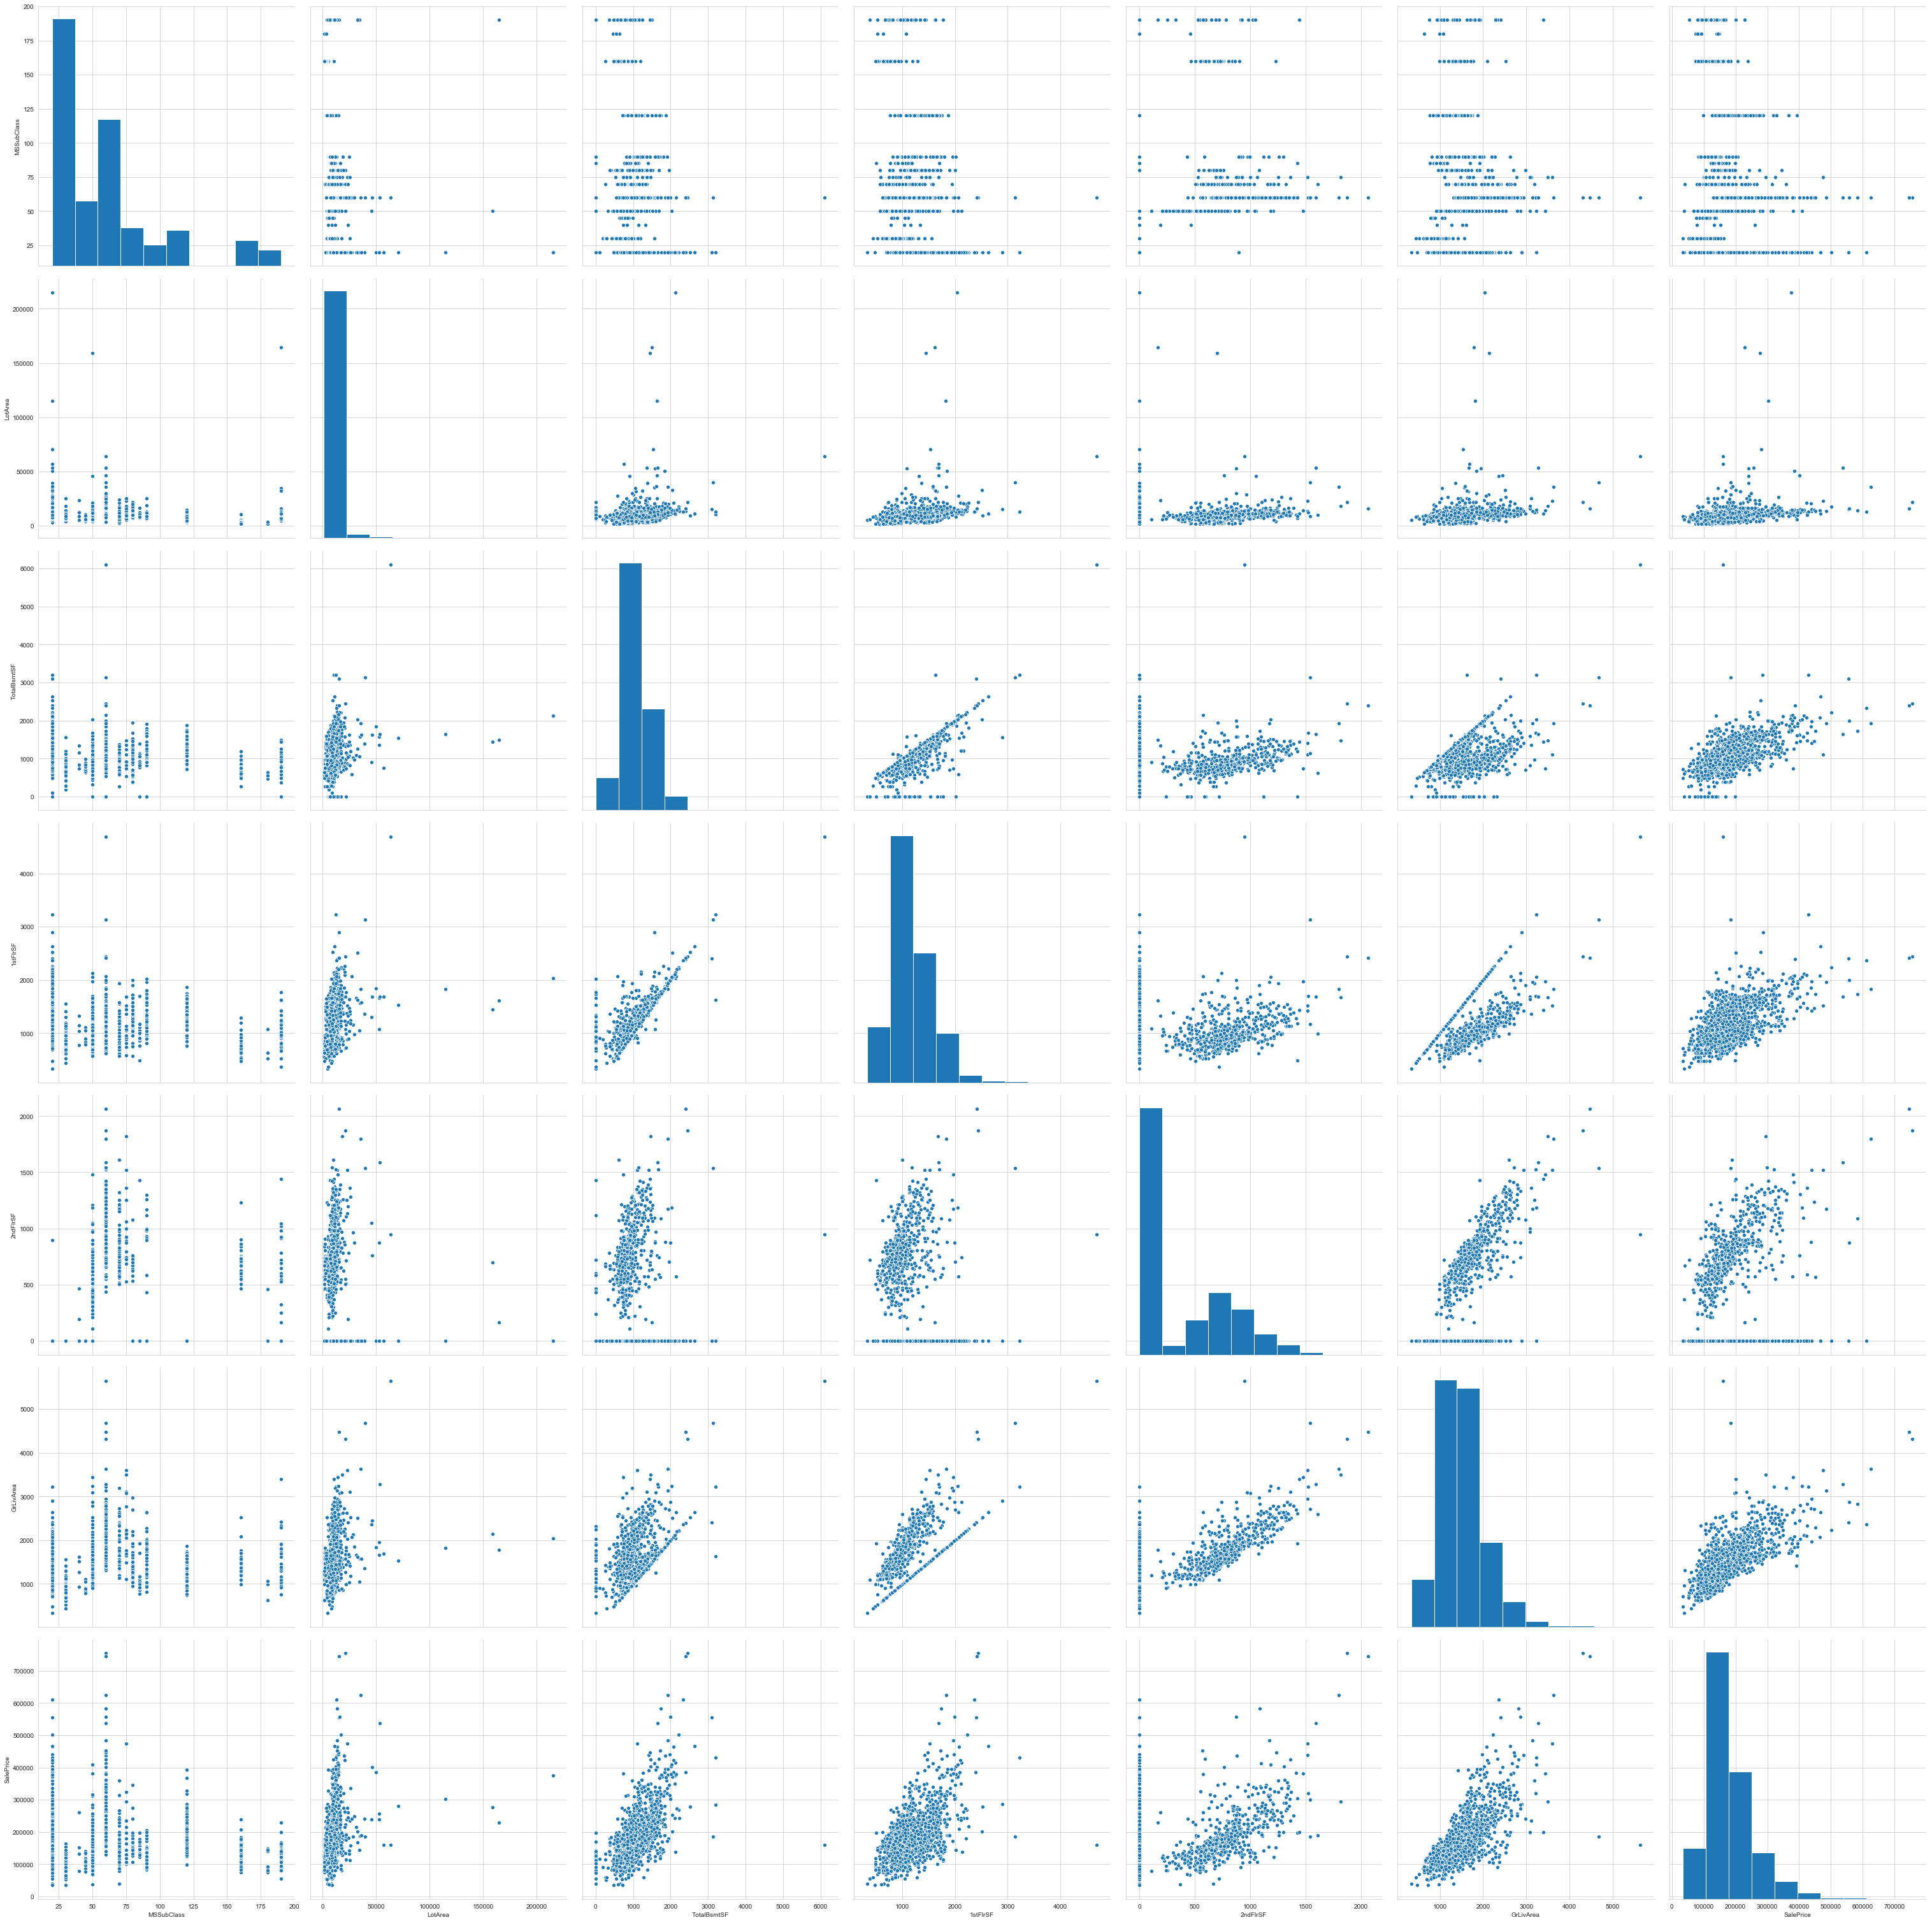

In [49]:
with open('house_prices_highly_important_features.txt') as f:
    highly_important_feat = f.read()
highly_important_feat = highly_important_feat.split('\n')

sns.pairplot(train[highly_important_feat + ['SalePrice']], height=6, );


In [75]:
axes[idx // 3, idx % 3]

In [78]:
len(highly_important_feat)

12

In [119]:
3 // 3

1

In [122]:
axes.shape

(4, 3)

In [123]:
len(highly_important_feat)

12

ValueError: could not convert string to float: 'Shed'

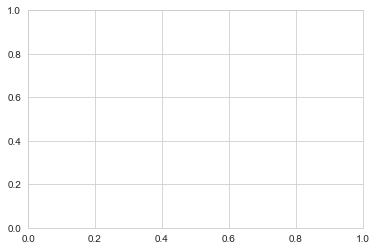

In [157]:
plt.scatter(train.MiscFeature, train.SalePrice)

MSSubClass
MSZoning
LotArea
Utilities
Neighborhood
BldgType
TotalBsmtSF
1stFlrSF
2ndFlrSF
GrLivArea
MiscFeature


ValueError: could not convert string to float: 'Shed'

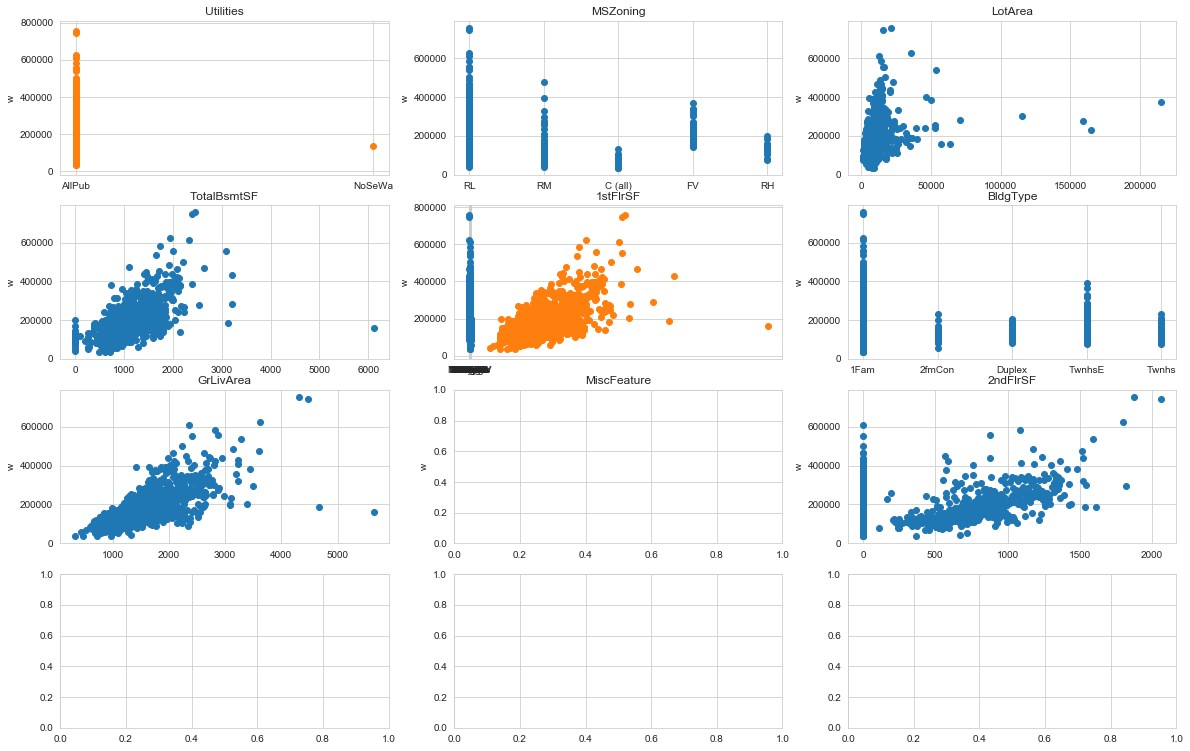

In [155]:
fig, axes = plt.subplots(nrows=4, ncols=3, figsize=(20, 13))
for idx, name in enumerate(highly_important_feat[:11]):
    print(name)
    axes[idx // 4, idx % 3].set_title(name)
    axes[idx // 4, idx % 3].set_ylabel('w')
    axes[idx // 4, idx % 3].scatter(train[name], train.SalePrice)
    plt.show
plt.tight_layout()

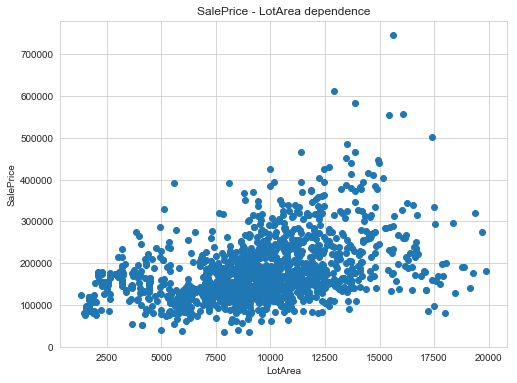

In [47]:
plt.figure(figsize=[6.4*1.25, 4.8*1.25])
plt.scatter(train.LotArea[train.LotArea < 20000], train.SalePrice[train.LotArea < 20000])
plt.xlabel('LotArea')
plt.ylabel('SalePrice')
plt.title('SalePrice - LotArea dependence')
plt.show()

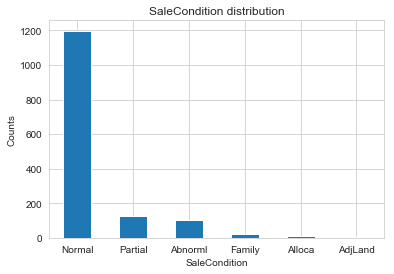

In [210]:
plot = train.SaleCondition.value_counts().plot.bar()
plot.set_xlabel('SaleCondition')
plot.set_ylabel('Counts')
plot.set_title('SaleCondition distribution')
plt.xticks(rotation='0');
plt.show()

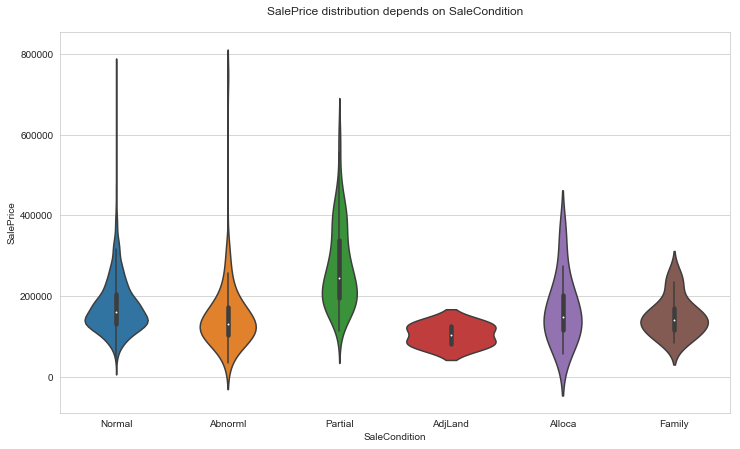

In [214]:
fig = plt.figure(figsize=(12, 7))
sns.violinplot(train.SaleCondition, train.SalePrice)
plt.title('SalePrice distribution depends on SaleCondition\n')
plt.show()

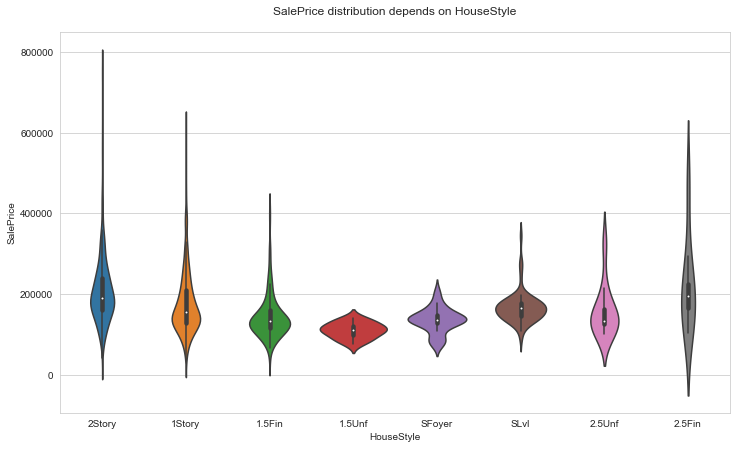

In [215]:
fig = plt.figure(figsize=(12, 7))
sns.violinplot(train.HouseStyle, train.SalePrice)
plt.title('SalePrice distribution depends on HouseStyle\n')
plt.show()

In [172]:
# Попробуем создать бинарный признак на основе того является ли недвижимость двухэтажной
train.head()
train.HouseStyle.value_counts()
train['2Story'] = train.HouseStyle.map(lambda x: 1 if x=='1Story' else 0)

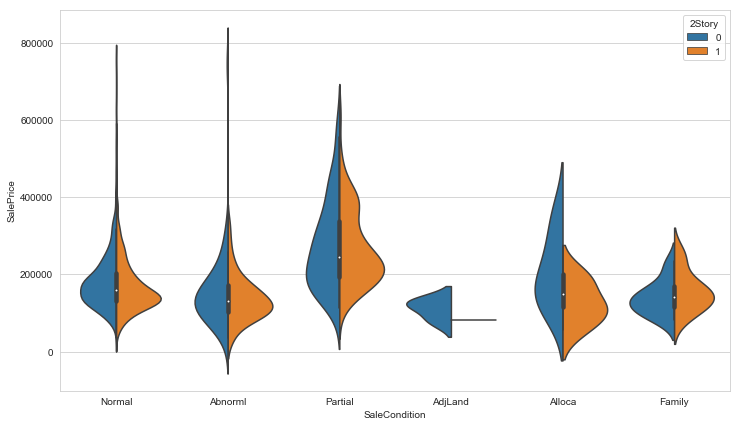

In [179]:
fig = plt.figure(figsize=(12, 7))
sns.violinplot(train.SaleCondition, train.SalePrice, hue=train['2Story'], split=True)
plt.show()

Визуализация данных с использованием метода главных компонент

In [253]:
# Отмасштабирум признаки
scaler = StandardScaler()
scaler.fit(df_corr_feat)
scaled_data = scaler.transform(df_corr_feat)

# Расчитаем PCA

model = PCA()
model.fit(scaled_data)
pca_components = model.transform(scaled_data)

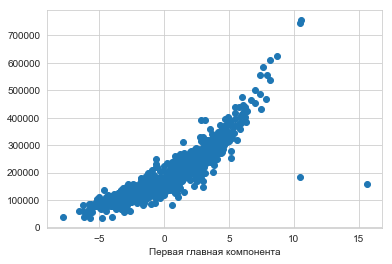

In [264]:
# есть странные выборсы, которые стоит изучить

plt.scatter(pca_components[:, 0], df_corr_feat.SalePrice)
plt.xlabel('Первая главная компонента')
plt.show()

In [124]:
# Посмотрим на те признаки, у которых линейная корреляция с ценой более 0.3

spearman_correlation_table = train.corr('spearman')['SalePrice']
spearman_correlation_table = spearman_correlation_table[spearman_correlation_table>0.3]
spearman_correlation_table

LotArea         0.456461
OverallQual     0.809829
YearBuilt       0.652682
YearRemodAdd    0.571159
BsmtFinSF1      0.301871
TotalBsmtSF     0.602725
1stFlrSF        0.575408
GrLivArea       0.731310
FullBath        0.635957
HalfBath        0.343008
TotRmsAbvGrd    0.532586
Fireplaces      0.519247
GarageYrBlt     0.634095
GarageCars      0.690711
GarageArea      0.649379
WoodDeckSF      0.353802
OpenPorchSF     0.477561
SalePrice       1.000000
Name: SalePrice, dtype: float64

In [125]:
# Теперь посмотрим корреляцию этих признаков друг с другом

corr_corr_table = train[spearman_correlation_table.index].corr('spearman')
corr_corr_table = corr_corr_table[corr_corr_table>0.7]
corr_corr_table

,LotArea,OverallQual,YearBuilt,YearRemodAdd,BsmtFinSF1,TotalBsmtSF,1stFlrSF,GrLivArea,FullBath,HalfBath,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,SalePrice
LotArea,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
OverallQual,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.809829
YearBuilt,NaN,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.864371,NaN,NaN,NaN,NaN,NaN
YearRemodAdd,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
BsmtFinSF1,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
TotalBsmtSF,NaN,NaN,NaN,NaN,NaN,1.000000,0.829292,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1stFlrSF,NaN,NaN,NaN,NaN,NaN,0.829292,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
GrLivArea,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,NaN,NaN,0.827874,NaN,NaN,NaN,NaN,NaN,NaN,0.731310
FullBath,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
HalfBath,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
train.corr()[train.corr()['SalePrice'][train.corr()['SalePrice']>0.3].index.tolist()]

,OverallQual,YearBuilt,YearRemodAdd,BsmtFinSF1,TotalBsmtSF,1stFlrSF,2ndFlrSF,GrLivArea,FullBath,TotRmsAbvGrd,Fireplaces,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,SalePrice
Id,-0.028365,-0.012713,-0.021998,-0.005024,-0.015415,0.010496,0.005590,0.008273,0.005587,0.027239,-0.019772,0.016570,0.017634,-0.029643,-0.000477,-0.021917
MSSubClass,0.032628,0.027850,0.040581,-0.069836,-0.238518,-0.251758,0.307886,0.074853,0.131608,0.040380,-0.045569,-0.040110,-0.098672,-0.012579,-0.006100,-0.084284
LotFrontage,0.176561,0.036853,0.078686,0.076670,0.238274,0.245181,0.042549,0.220347,0.120548,0.221396,0.044018,0.165229,0.201473,-0.016780,0.069605,0.209624
LotArea,0.105806,0.014228,0.013788,0.214103,0.260833,0.299475,0.050986,0.263116,0.126031,0.190015,0.271364,0.154871,0.180403,0.171698,0.084774,0.263843
OverallQual,1.000000,0.572323,0.550684,0.239666,0.537808,0.476224,0.295493,0.593007,0.550600,0.427452,0.396765,0.600671,0.562022,0.238923,0.308819,0.790982
OverallCond,-0.091932,-0.375983,0.073741,-0.046231,-0.171098,-0.144203,0.028942,-0.079686,-0.194149,-0.057583,-0.023820,-0.185758,-0.151521,-0.003334,-0.032589,-0.077856
YearBuilt,0.572323,1.000000,0.592855,0.249503,0.391452,0.281986,0.010308,0.199010,0.468271,0.095589,0.147716,0.537850,0.478954,0.224880,0.188686,0.522897
YearRemodAdd,0.550684,0.592855,1.000000,0.128451,0.291066,0.240379,0.140024,0.287389,0.439046,0.191740,0.112581,0.420622,0.371600,0.205726,0.226298,0.507101
BsmtFinSF1,0.239666,0.249503,0.128451,1.000000,0.522396,0.445863,-0.137079,0.208171,0.058543,0.044316,0.260011,0.224054,0.296970,0.204306,0.111761,0.386420
BsmtFinSF2,-0.059119,-0.049107,-0.067759,-0.050117,0.104810,0.097117,-0.099260,-0.009640,-0.076444,-0.035227,0.046921,-0.038264,-0.018227,0.067898,0.003093,-0.011378


In [129]:
#создадим датасет с коррелирующими переменными, а так же датасет с коррелирующими плюс дамми переменными, 
#построенными на качественных признаках

quality_features_list = train.dtypes[train.dtypes == object].index.tolist()+['MSSubClass', 
                                'OverallQual', 'OverallCond']
df_corr_feat = train[spearman_correlation_table.index.tolist()]
df_corr_dummy_feat = pd.get_dummies(train[spearman_correlation_table.index.tolist() + quality_features_list], 
                                  columns=quality_features) 

In [127]:
df_corr_feat.describe()

,LotArea,OverallQual,YearBuilt,YearRemodAdd,BsmtFinSF1,TotalBsmtSF,1stFlrSF,GrLivArea,FullBath,HalfBath,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,SalePrice
count,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,10516.828082,6.099315,1971.267808,1984.865753,443.639726,1057.429452,1162.626712,1515.463699,1.565068,0.382877,6.517808,0.613014,1868.739726,1.767123,472.980137,94.244521,46.660274,180921.195890
std,9981.264932,1.382997,30.202904,20.645407,456.098091,438.705324,386.587738,525.480383,0.550916,0.502885,1.625393,0.644666,453.697295,0.747315,213.804841,125.338794,66.256028,79442.502883
min,1300.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,334.000000,334.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,34900.000000
25%,7553.500000,5.000000,1954.000000,1967.000000,0.000000,795.750000,882.000000,1129.500000,1.000000,0.000000,5.000000,0.000000,1958.000000,1.000000,334.500000,0.000000,0.000000,129975.000000
50%,9478.500000,6.000000,1973.000000,1994.000000,383.500000,991.500000,1087.000000,1464.000000,2.000000,0.000000,6.000000,1.000000,1977.000000,2.000000,480.000000,0.000000,25.000000,163000.000000
75%,11601.500000,7.000000,2000.000000,2004.000000,712.250000,1298.250000,1391.250000,1776.750000,2.000000,1.000000,7.000000,1.000000,2001.000000,2.000000,576.000000,168.000000,68.000000,214000.000000
max,215245.000000,10.000000,2010.000000,2010.000000,5644.000000,6110.000000,4692.000000,5642.000000,3.000000,2.000000,14.000000,3.000000,2010.000000,4.000000,1418.000000,857.000000,547.000000,755000.000000


In [131]:
X_train_corr, X_test_corr, y_train, y_test = train_test_split(df_corr_feat.drop('SalePrice', axis=1), df_corr_feat['SalePrice'])
X_train_corr_dumm, X_test_corr_dumm, = train_test_split(df_corr_dummy_feat.drop('SalePrice', axis=1))

In [133]:
X_train_corr.shape, X_test_corr.shape, y_train.shape, y_test.shape

((1095, 17), (365, 17), (1095,), (365,))

In [135]:
X_train_corr_dumm.shape, X_test_corr_dumm.shape

((1095, 655), (365, 655))

In [16]:
model = LinearRegression(normalize=True)